In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
from IPython.display import HTML


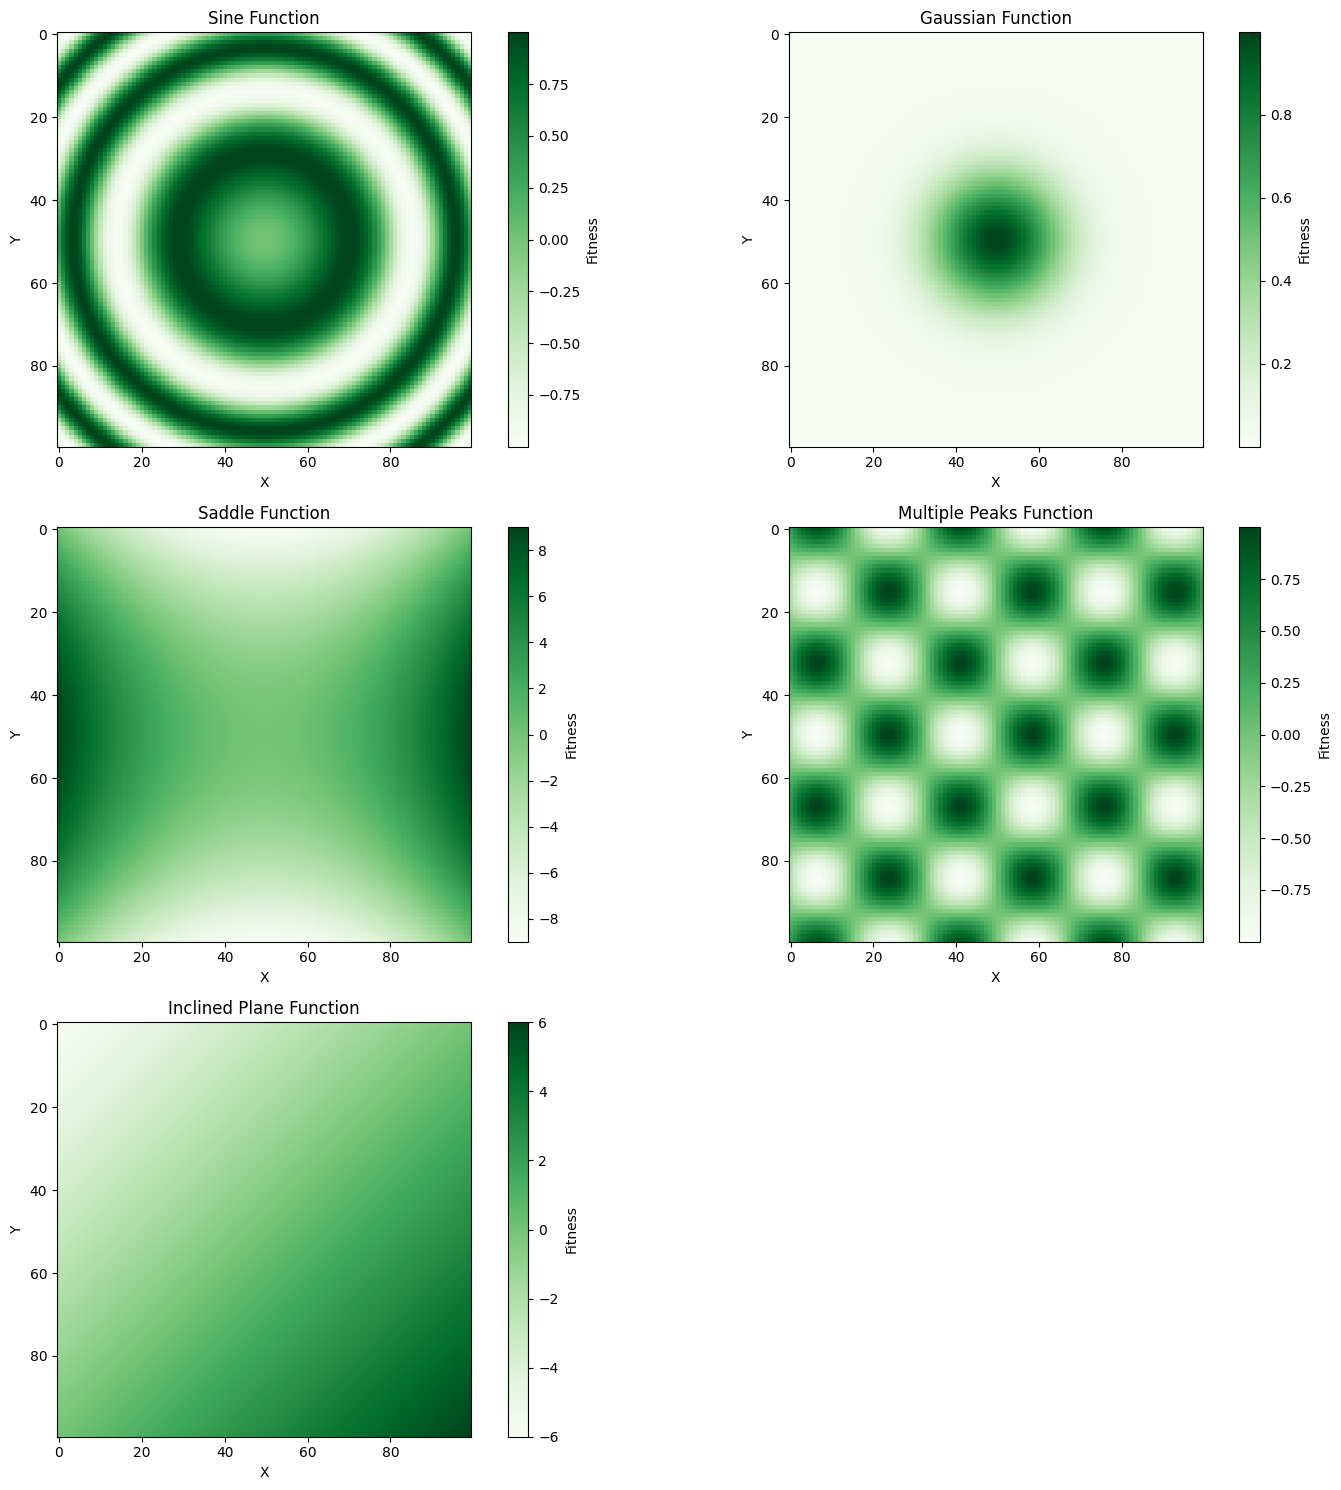

In [ ]:


# Parámetros
tsize = 100

def plot_graph(fitness_matrix):
  plt.figure(figsize=(10, 8))
  plt.imshow(fitness_matrix, cmap='Greens', interpolation='nearest')
  plt.colorbar(label='Fitness')
  plt.title('Mapa de calor de la matriz de fitness')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()
# Funciones para generar diferentes matrices de fitness
def generate_fitness_matrix_sine(tsize):
    x = np.linspace(-3, 3, tsize)
    y = np.linspace(-3, 3, tsize)
    x, y = np.meshgrid(x, y)
    fitness = np.sin(x**2 + y**2)
    return fitness

def generate_fitness_matrix_gaussian(tsize):
    x = np.linspace(-3, 3, tsize)
    y = np.linspace(-3, 3, tsize)
    x, y = np.meshgrid(x, y)
    fitness = np.exp(-(x**2 + y**2))
    return fitness

def generate_fitness_matrix_saddle(tsize):
    x = np.linspace(-3, 3, tsize)
    y = np.linspace(-3, 3, tsize)
    x, y = np.meshgrid(x, y)
    fitness = x**2 - y**2
    return fitness

def generate_fitness_matrix_multiple_peaks(tsize):
    x = np.linspace(-3, 3, tsize)
    y = np.linspace(-3, 3, tsize)
    x, y = np.meshgrid(x, y)
    fitness = np.sin(3*x) * np.cos(3*y)
    return fitness

def generate_fitness_matrix_inclined_plane(tsize):
    x = np.linspace(-3, 3, tsize)
    y = np.linspace(-3, 3, tsize)
    x, y = np.meshgrid(x, y)
    fitness = x + y
    return fitness

# Generar y mostrar todas las matrices
fitness_functions = [
    ("Sine Function", generate_fitness_matrix_sine),
    ("Gaussian Function", generate_fitness_matrix_gaussian),
    ("Saddle Function", generate_fitness_matrix_saddle),
    ("Multiple Peaks Function", generate_fitness_matrix_multiple_peaks),
    ("Inclined Plane Function", generate_fitness_matrix_inclined_plane)
]

plt.figure(figsize=(15, 15))
for i, (title, func) in enumerate(fitness_functions):
    plt.subplot(3, 2, i + 1)
    fitness_matrix = func(tsize)
    plt.imshow(fitness_matrix, cmap='Greens', interpolation='nearest')
    plt.colorbar(label='Fitness')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

plt.tight_layout()
plt.show()


In [ ]:
def mostrar_sol(fitness_matrix,best_position):
  plt.figure(figsize=(10, 8))
  plt.imshow(fitness_matrix, cmap='Greens', interpolation='nearest')
  plt.colorbar(label='Fitness')
  plt.scatter(best_position[1], best_position[0], color='red', marker='x')  # Invertir los índices para la visualización correcta
  plt.title('Mapa de calor de la matriz de fitness con el mejor valor encontrado')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()
def mostrar_pob(fitness_matrix, pelicans, best_position):
    plt.figure(figsize=(10, 8))
    plt.imshow(fitness_matrix, cmap='Greens', interpolation='nearest')
    plt.colorbar(label='Fitness')
    # Mostrar la población entera
    plt.scatter(pelicans[:, 1], pelicans[:, 0], color='blue', marker='o', label='Población')
    # Mostrar la mejor posición encontrada
    plt.scatter(best_position[1], best_position[0], color='red', marker='x', label='Mejor Posición')  # Invertir los índices para la visualización correcta
    plt.title('Mapa de calor de la matriz de fitness con la población de pelícanos')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
# Función de fitness que obtiene el valor en una posición de la matriz
def fitness_function(matrix, position):
    x, y = position
    return matrix[x, y]

# Algoritmo de Optimización de Pelícanos
def POA(fitness_matrix, nit=100, pob_size=100):
    tsize = fitness_matrix.shape[0]
    pelicans = np.random.randint(0, tsize, (pob_size, 2))
    best_pelican = pelicans[0]
    best_fitness = fitness_function(fitness_matrix, best_pelican)
    pelican_positions = []
    prey_positions = []

    for t in range(nit):
        pelican_positions.append(pelicans.copy())
        prey = np.random.randint(0, tsize, 2)
        prey_positions.append(prey.copy())
        prey_fitness = fitness_function(fitness_matrix, prey)
        for i in range(pob_size):
            current_fitness = fitness_function(fitness_matrix, pelicans[i])
            current_sol = pelicans[i].copy()
            if prey_fitness > current_fitness:
                direction = prey - pelicans[i]
            else:
                direction = pelicans[i] - prey

            move_step = np.sign(direction) * random.random()
            new_position = pelicans[i] + move_step.astype(int)
            new_position = np.clip(new_position, 0, tsize - 1)

            new_fitness = fitness_function(fitness_matrix, new_position)
            if new_fitness > current_fitness:
                pelicans[i] = new_position
                current_fitness = new_fitness


            range_ = max(1, tsize // (2 * (nit - t)))
            neighbor = pelicans[i] + np.random.randint(-range_, range_ + 1, 2)
            neighbor = np.clip(neighbor, 0, tsize - 1)
            neighbor_fitness = fitness_function(fitness_matrix, neighbor)

            if neighbor_fitness > fitness_function(fitness_matrix, pelicans[i]):
                pelicans[i] = neighbor

            if fitness_function(fitness_matrix, pelicans[i]) > best_fitness:
                best_fitness = fitness_function(fitness_matrix, pelicans[i])
                best_pelican = pelicans[i]

    pelican_positions.append(pelicans.copy())
    prey_positions.append(prey.copy())
    return pelican_positions, prey_positions, best_pelican, best_fitness
def animate_solution(fitness_matrix, pelican_positions, prey_positions, best_position):
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.imshow(fitness_matrix, cmap='Greens', interpolation='nearest')
    fig.colorbar(cax, ax=ax, label='Fitness')

    scat = ax.scatter([], [], color='blue', marker='o', label='Población')
    prey_scat = ax.scatter([], [], color='orange', marker='s', label='Presa')
    best_scat = ax.scatter([], [], color='red', marker='x', label='Mejor Posición')
    ax.legend()

    def update(frame):
        pelicans = pelican_positions[frame]
        prey = prey_positions[frame]
        scat.set_offsets(np.c_[pelicans[:, 1], pelicans[:, 0]])
        prey_scat.set_offsets([prey[1], prey[0]])
        best_scat.set_offsets([best_position[1], best_position[0]])
        return scat, prey_scat, best_scat

    ani = animation.FuncAnimation(fig, update, frames=len(pelican_positions), blit=True, repeat=False)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Evolución de la Población de Pelícanos y Presa')
    return ani

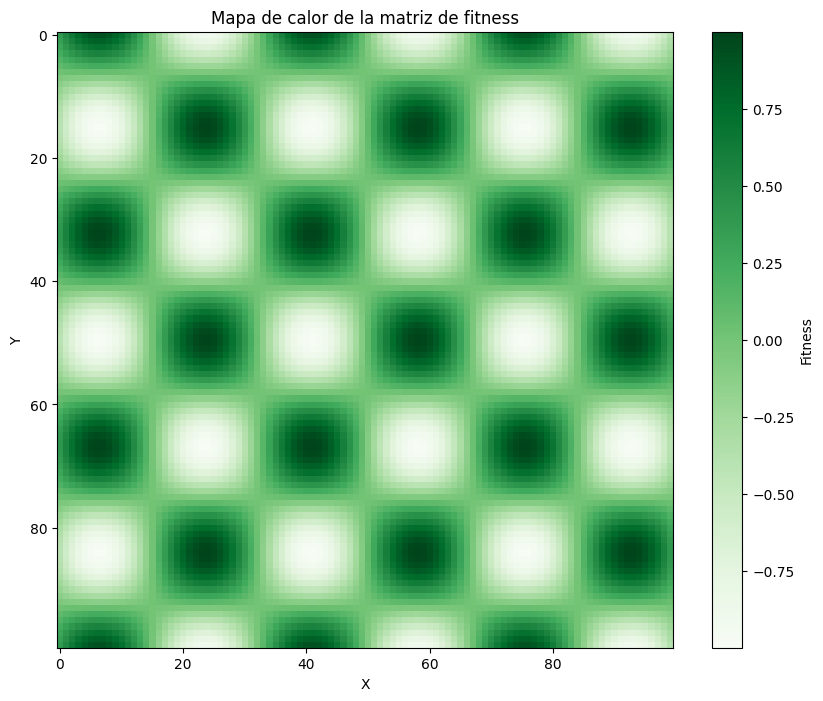

In [ ]:
fitness_functions = [
    ("Sine Function", generate_fitness_matrix_sine),
    ("Gaussian Function", generate_fitness_matrix_gaussian),
    ("Saddle Function", generate_fitness_matrix_saddle),
    ("Multiple Peaks Function", generate_fitness_matrix_multiple_peaks),
    ("Inclined Plane Function", generate_fitness_matrix_inclined_plane)
]
tsize = 100
fitness_matrix = fitness_functions[3][1](tsize)
plot_graph(fitness_matrix)

In [ ]:

pelican_positions,prey_positions,best_position, best_value = POA(fitness_matrix, nit=50, pob_size=100)
print(f"Mejor posición: {best_position}, Mejor valor de fitness: {best_value}")

Mejor posición: [15 58], Mejor valor de fitness: 0.9996242470579977


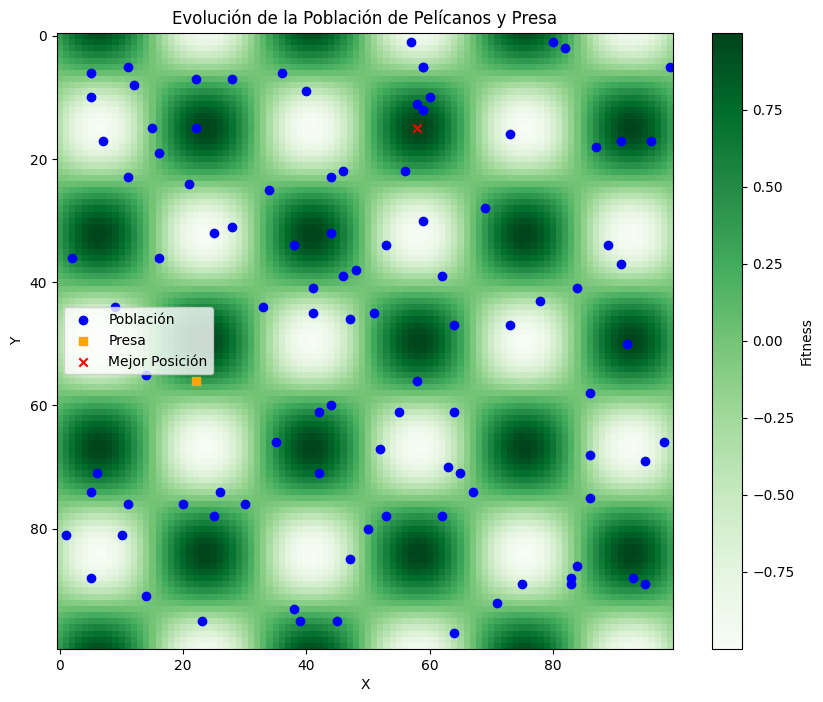

In [ ]:
ani = animate_solution(fitness_matrix, pelican_positions,prey_positions, best_position)


In [ ]:
HTML(ani.to_jshtml())